In [0]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [0]:
#Baca Data
df = pd.read_csv("clustering.csv")
df

,value_eur,wage_eur
0,95500000,565000
1,58500000,405000
2,105500000,290000
3,77500000,125000
4,90000000,470000
...,...,...
18273,40000,2000
18274,40000,2000
18275,40000,1000
18276,40000,1000


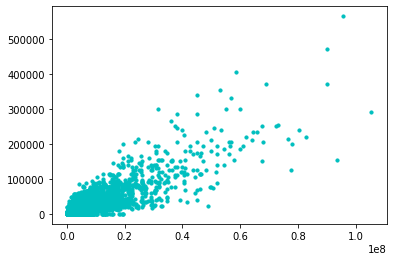

In [0]:
#Memvisualkan persebaran data
plt.scatter(df.value_eur, df.wage_eur, s =10, c = "c", marker = "o", alpha = 1)
plt.show()

In [0]:
# Menentukan variabel yang akan diClusterkan
df_x = df.iloc[:, 1:3]
df_x.head()

,wage_eur
0,565000
1,405000
2,290000
3,125000
4,470000


In [0]:
#Mengubah Variabel Data Frame Menjadi Array
x_array =  np.array(df_x)
print(x_array)

[[565000]
 [405000]
 [290000]
 ...
 [  1000]
 [  1000]
 [  2000]]


In [0]:
# Menstandarkan Ukuran Variabel
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[1.        ],
       [0.71681416],
       [0.51327434],
       ...,
       [0.00176991],
       [0.00176991],
       [0.00353982]])

In [0]:
# Menentukan dan mengkonfigurasi fungsi kmeans
kmeans = KMeans(n_clusters = 5, random_state=123)

In [0]:
# Menentukan kluster dari data
kmeans.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [0]:
# Menampilkan pusat cluster
print(kmeans.cluster_centers_)

[[0.00576143]
 [0.10242731]
 [0.25908492]
 [0.03900717]
 [0.52939317]]


In [0]:
# Menampilkan Hasil Kluster
print(kmeans.labels_)

[4 4 4 ... 0 0 0]


In [0]:
# Menambahkan Kolom "kluster" Dalam Data Frame Driver
df["kluster"] = kmeans.labels_

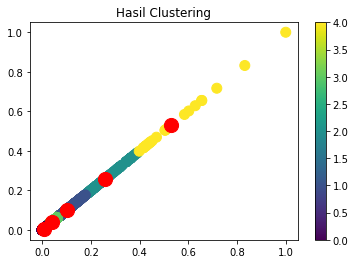

In [0]:
# Memvisualkan hasil kluster
hasil = plt.scatter(x_scaled[:,0], x_scaled[:,0], s = 100, c = df.kluster, marker = "o", alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,0], c='red', s=200, alpha=1 , marker="o");
plt.title("Hasil Clustering")
plt.colorbar (hasil)
plt.show()